In [64]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


In [65]:
data = pd.read_csv("output.csv")
data.head()

Unnamed: 0  train   Dmr  Pasg  Pec    Kugt  Nlkt  Manu  Skap  Jwnr  ...  \
0           1  13173  5280   NaN  NaN  4680.0   NaN   NaN   NaN   NaN  ...   
1           2  13173  4200   NaN  NaN  3960.0   NaN   NaN   NaN   NaN  ...   
2           3  13173  2220   NaN  NaN  1320.0   NaN   NaN   NaN   NaN  ...   
3           4  13173  7800   NaN  NaN  6840.0   NaN   NaN   NaN   NaN  ...   
4           5  13173  8340   NaN  NaN  8760.0   NaN   NaN   NaN   NaN  ...   

   Nlkt_delay  Manu_delay   Skap_delay   Jwnr_delay  Absa_delay   Mgkm_delay  \
0     59925.0     60750.0  60985.71429  61928.57143       62400  62904.67290   
1     58965.0     59550.0  59717.14286  60385.71429       60720  61695.70093   
2     56385.0     57030.0  57214.28571  57951.42857       58320  59531.21495   
3     62085.0     62910.0  63145.71429  64088.57143       64560  65804.85981   
4     64020.0     64860.0  65100.00000  66060.00000       66540  67515.70093   

    Tlmr_delay   Jrna_delay   Jgnr_delay  Agtl_delay  
0  63190.65421  63728.97196  64082.24299       64200  
1  62248.59813  63289.34579  63972.33645       64200  
2  60217.57009  61509.53271  62357.38318       62640  
3  66510.28037  67838.13084  68709.53271       69000  
4  68068.59813  69109.34579  69792.33645       70020  

[5 rows x 44 columns]

"Pasg_delay""Kugt_delay","Nlkt_delay",

"Pasg_actual","Kugt_actual","Nlkt_actual",

In [66]:

delay_cols = ["Dmr_delay","Pasg_delay","Kugt_delay","Pec_delay","Nlkt_delay","Manu_delay","Skap_delay",
"Jwnr_delay","Absa_delay","Mgkm_delay","Tlmr_delay","Jrna_delay","Jgnr_delay","Agtl_delay"]
actual_cols = ["Dmr_actual","Pasg_actual","Kugt_actual","Pec_actual","Nlkt_actual","Manu_actual","Skap_actual"
,"Jwnr_actual","Absa_actual","Mgkm_actual","Tlmr_actual","Jrna_actual","Jgnr_actual","Agtl_actual"]

In [67]:
def detect_outliers(data):
    Q1 = np.percentile(data, 25)
    Q3 = np.percentile(data, 75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    outliers = (data < lower_bound) | (data > upper_bound)
    return outliers

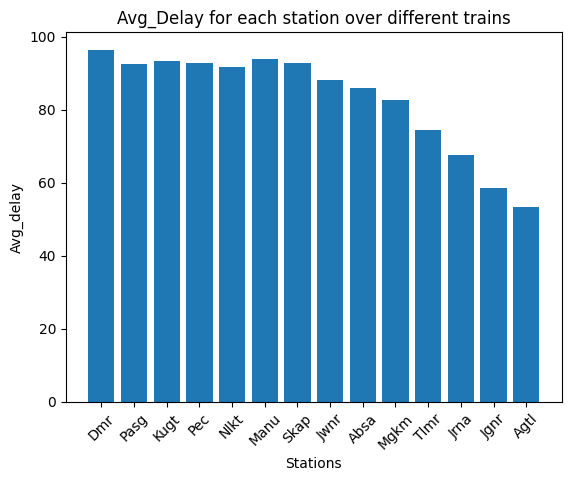

In [68]:
import matplotlib.pyplot as plt
import numpy as np

stations = [i[:-6] for i in delay_cols]
avg_delay = []

for i in range(len(delay_cols)):
    # Detect outliers
    outliers_indices = detect_outliers(data[delay_cols[i]] - data[actual_cols[i]])

    # Filter out outliers
    filtered_data = data[~outliers_indices]

    # Compute average delay after removing outliers
    avg_delay.append((sum(filtered_data[delay_cols[i]] - filtered_data[actual_cols[i]]) / len(filtered_data)) / 60)

bar_width = 0.8

plt.bar(stations, avg_delay, width=bar_width)
plt.title("Avg_Delay for each station over different trains")
plt.xticks(rotation=45)
plt.xlabel("Stations")
plt.ylabel("Avg_delay")
plt.show()



----------------------------------------------------------------------------------------------------
For the station: Dmr


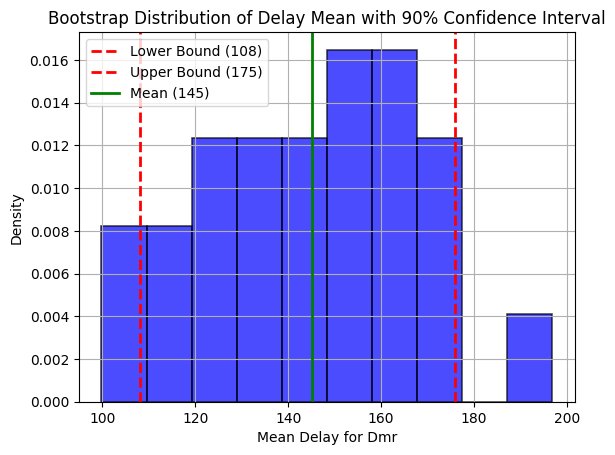

----------------------------------------------------------------------------------------------------
----------------------------------------------------------------------------------------------------
For the station: Pasg


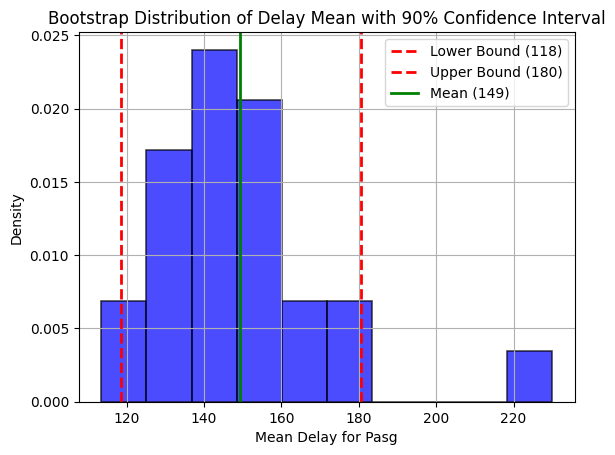

----------------------------------------------------------------------------------------------------
----------------------------------------------------------------------------------------------------
For the station: Kugt


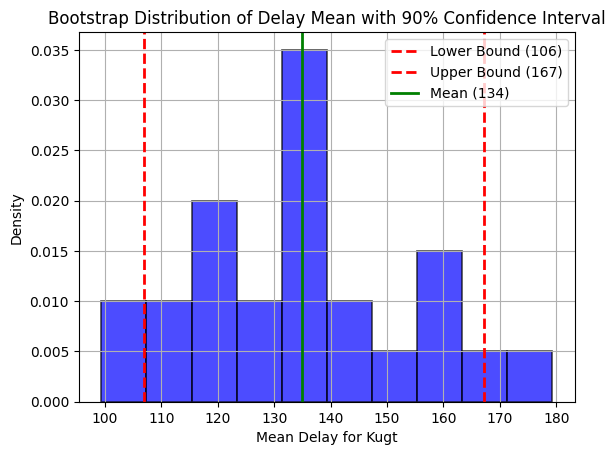

----------------------------------------------------------------------------------------------------
----------------------------------------------------------------------------------------------------
For the station: Pec


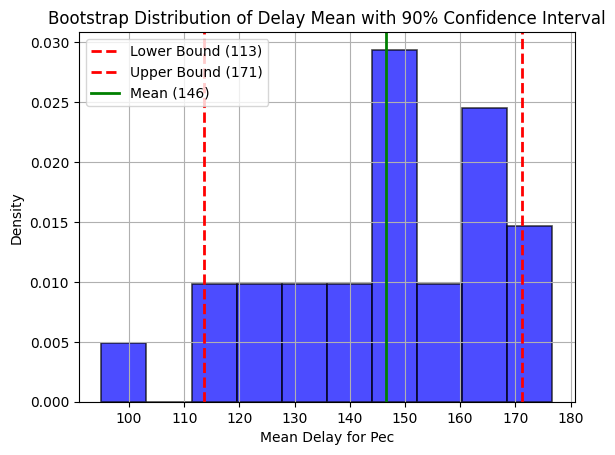

----------------------------------------------------------------------------------------------------
----------------------------------------------------------------------------------------------------
For the station: Nlkt


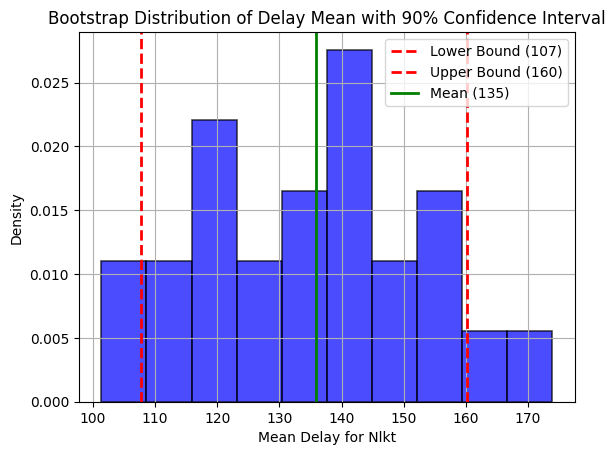

----------------------------------------------------------------------------------------------------
----------------------------------------------------------------------------------------------------
For the station: Manu


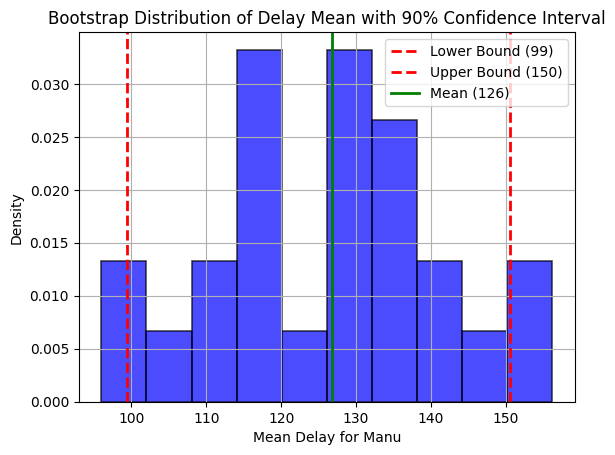

----------------------------------------------------------------------------------------------------
----------------------------------------------------------------------------------------------------
For the station: Skap


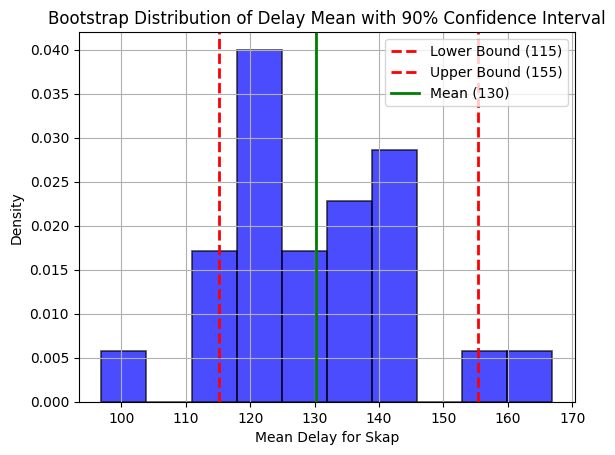

----------------------------------------------------------------------------------------------------
----------------------------------------------------------------------------------------------------
For the station: Jwnr


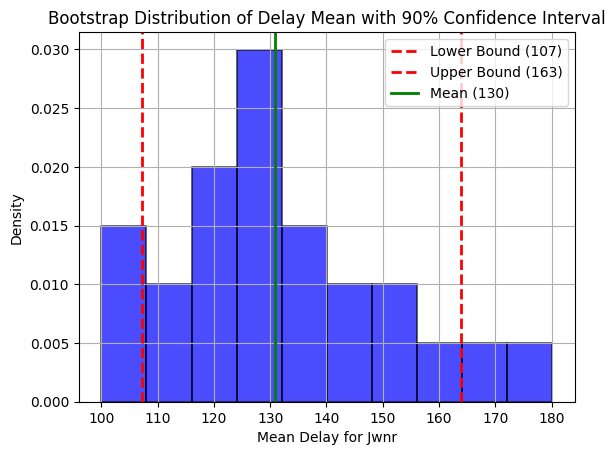

----------------------------------------------------------------------------------------------------
----------------------------------------------------------------------------------------------------
For the station: Absa


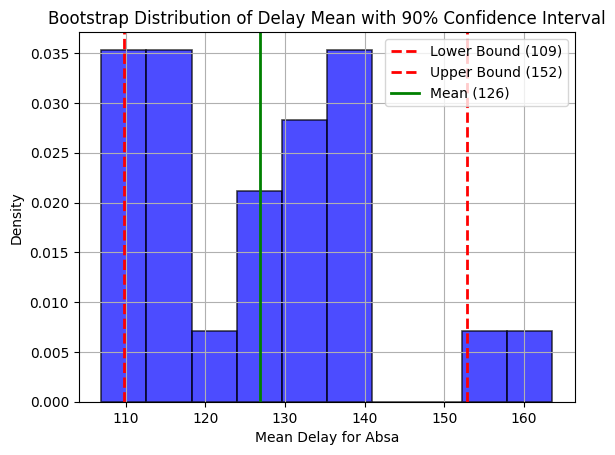

----------------------------------------------------------------------------------------------------
----------------------------------------------------------------------------------------------------
For the station: Mgkm


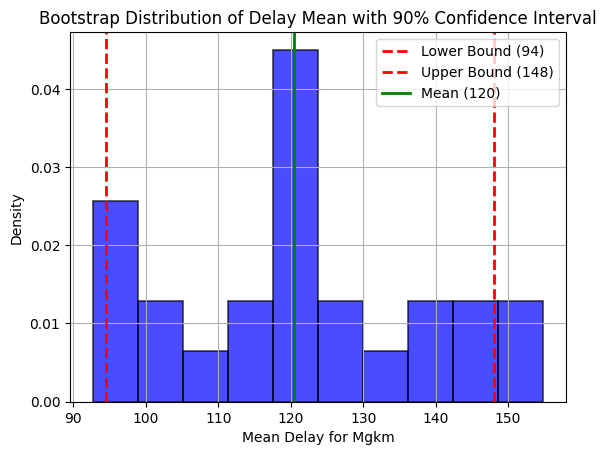

----------------------------------------------------------------------------------------------------
----------------------------------------------------------------------------------------------------
For the station: Tlmr


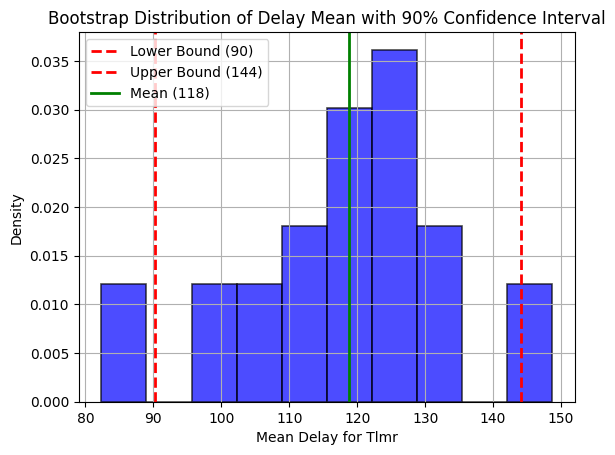

----------------------------------------------------------------------------------------------------
----------------------------------------------------------------------------------------------------
For the station: Jrna


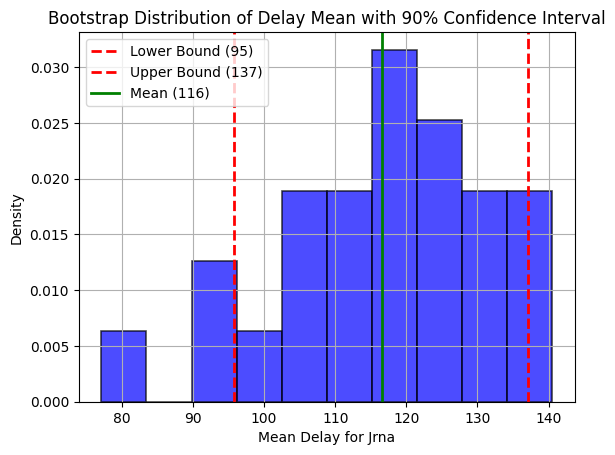

----------------------------------------------------------------------------------------------------
----------------------------------------------------------------------------------------------------
For the station: Jgnr


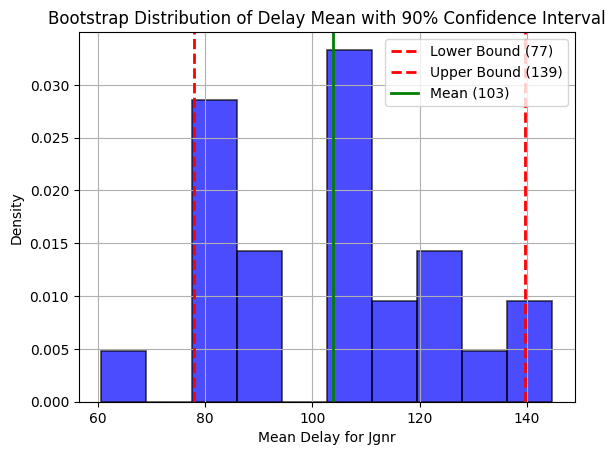

----------------------------------------------------------------------------------------------------
----------------------------------------------------------------------------------------------------
For the station: Agtl


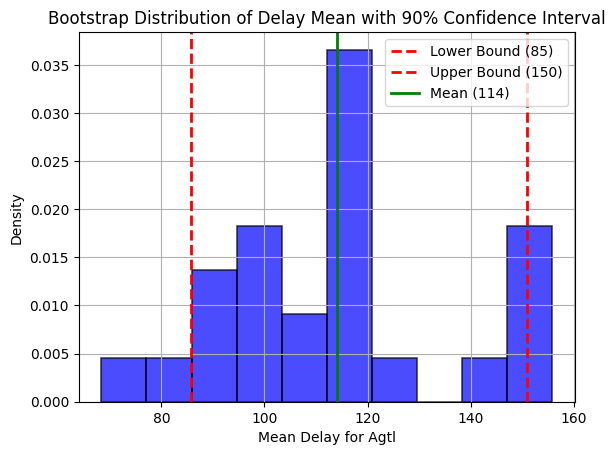

----------------------------------------------------------------------------------------------------


In [70]:
import numpy as np
import matplotlib.pyplot as plt

# Function to generate bootstrap samples
def bootstrap_samples(data, num_samples):
    n = len(data)
    samples = [np.random.choice(data, n, replace=True) for _ in range(num_samples)]
    return samples

# Function to calculate mean and confidence interval
def calculate_ci(data, confidence=0.90):
    mean = np.mean(data)
    lower_percentile = (1 - confidence) / 2
    upper_percentile = 1 - lower_percentile
    lower_bound = np.percentile(data, lower_percentile * 100)
    upper_bound = np.percentile(data, upper_percentile * 100)
    return mean, lower_bound, upper_bound

# Example data (replace this with your delay list)
# delay_list = [10, 12, 14, 16, 18, 20, 22, 24, 26, 28]
for i in range(len(delay_cols)):
  print("-"*100)
  print("For the station:",stations[i])
  delay_list = data[delay_cols[i]] - data[actual_cols[i]]
  delay_list /= 60
# Generate bootstrap samples
  bootstrap_samples_list = bootstrap_samples(delay_list, 25)

  # Calculate mean for each bootstrap sample
  bootstrap_means = [np.mean(sample) for sample in bootstrap_samples_list]

  # Calculate confidence interval
  mean, lower_bound, upper_bound = calculate_ci(bootstrap_means)

  # # Plotting
  # plt.figure(figsize=(10, 6))

  # Plot histogram of bootstrap means
  plt.hist(bootstrap_means, bins=10, alpha=0.7, color='blue', edgecolor='black', linewidth=1.2, density=True)

  # Plot confidence interval lines
  plt.axvline(x=lower_bound, color='red', linestyle='--', linewidth=2, label=f'Lower Bound ({int(lower_bound)})')
  plt.axvline(x=upper_bound, color='red', linestyle='--', linewidth=2, label=f'Upper Bound ({int(upper_bound)})')

  # Plot mean line
  plt.axvline(x=mean, color='green', linestyle='-', linewidth=2, label=f'Mean ({int(mean)})')

  plt.title('Bootstrap Distribution of Delay Mean with 90% Confidence Interval')
  plt.xlabel(f'Mean Delay for {stations[i]}')
  plt.ylabel('Density')
  plt.legend()
  plt.grid(True)
  plt.show()
  print("-"*100)


----------------------------------------------------------------------------------------------------
For the station: Dmr


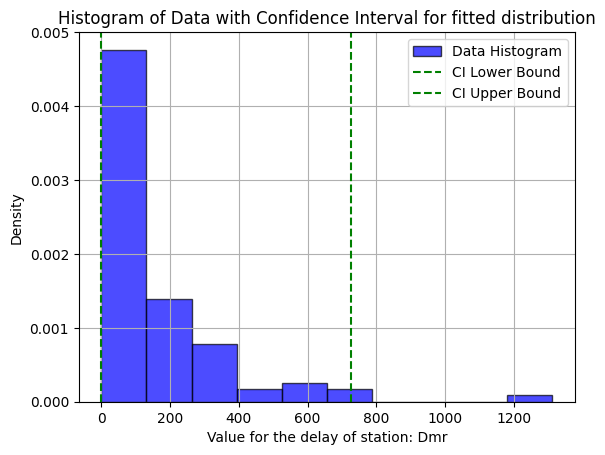

----------------------------------------------------------------------------------------------------
For the station: Pasg


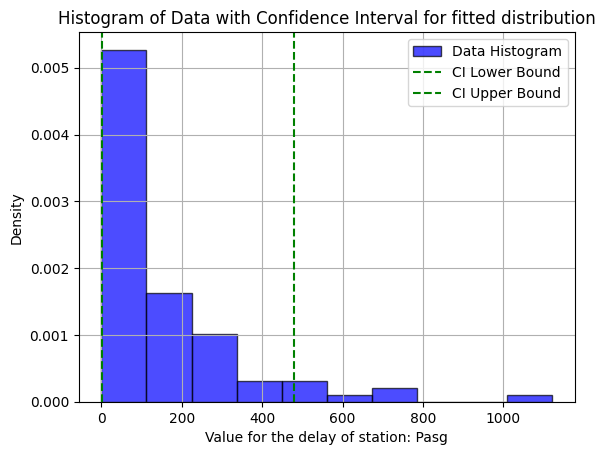

----------------------------------------------------------------------------------------------------
For the station: Kugt


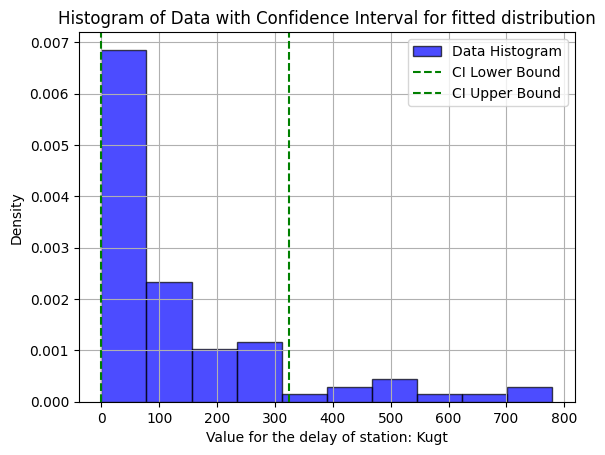

----------------------------------------------------------------------------------------------------
For the station: Pec


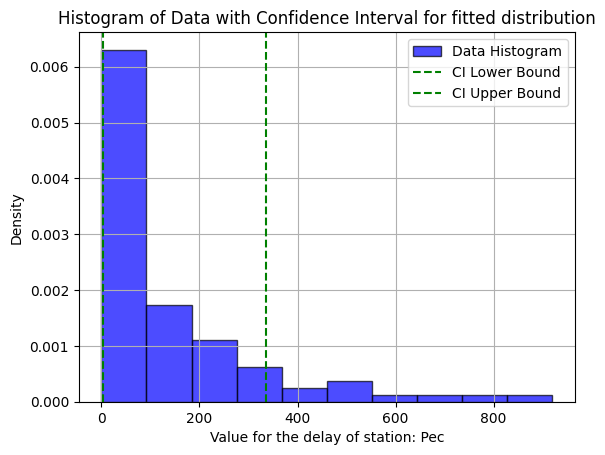

----------------------------------------------------------------------------------------------------
For the station: Nlkt


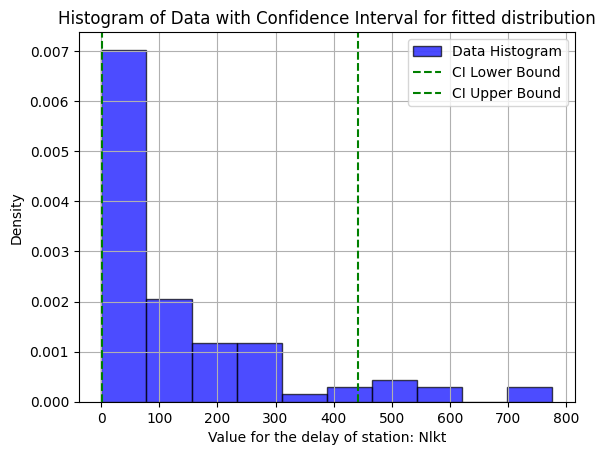

----------------------------------------------------------------------------------------------------
For the station: Manu


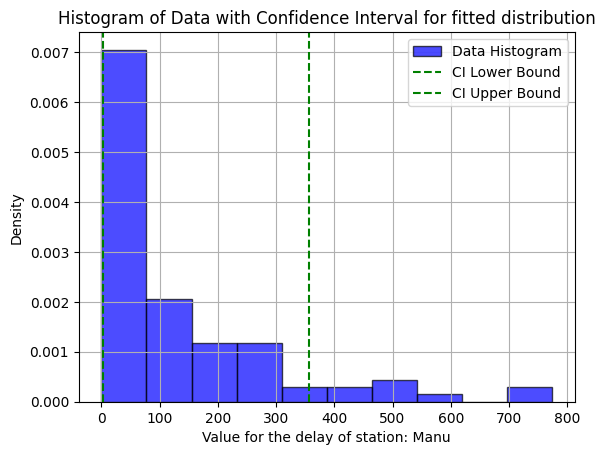

----------------------------------------------------------------------------------------------------
For the station: Skap


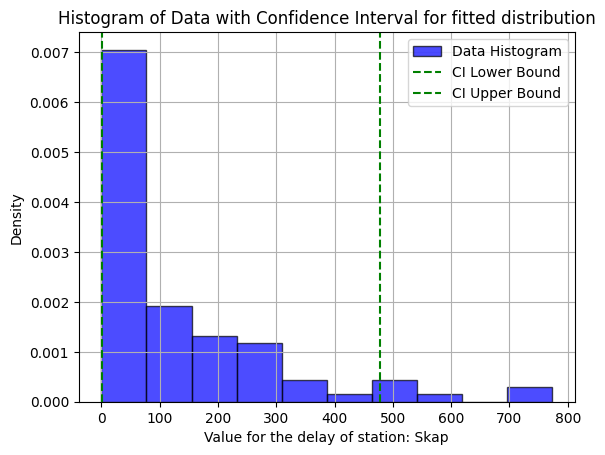

----------------------------------------------------------------------------------------------------
For the station: Jwnr


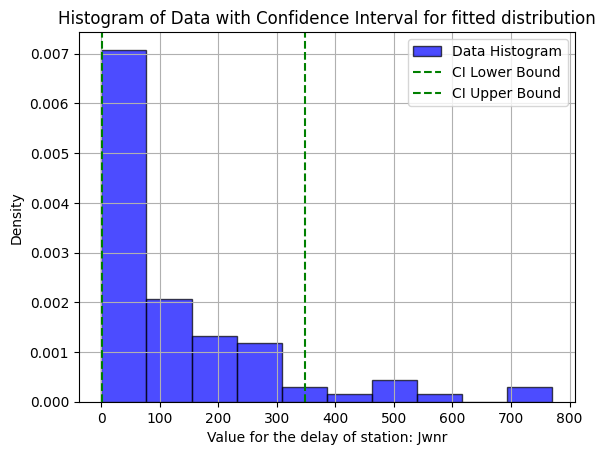

----------------------------------------------------------------------------------------------------
For the station: Absa


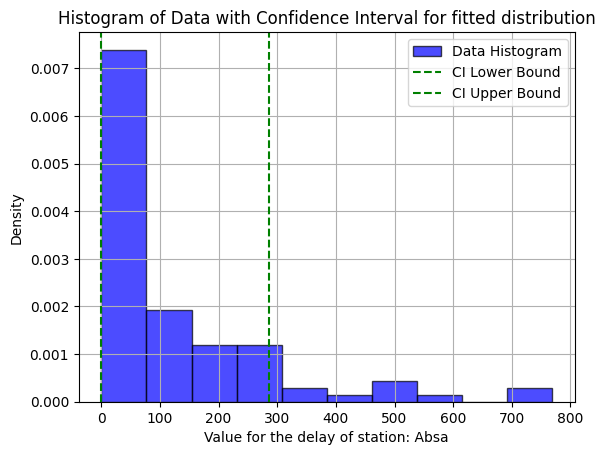

----------------------------------------------------------------------------------------------------
For the station: Mgkm


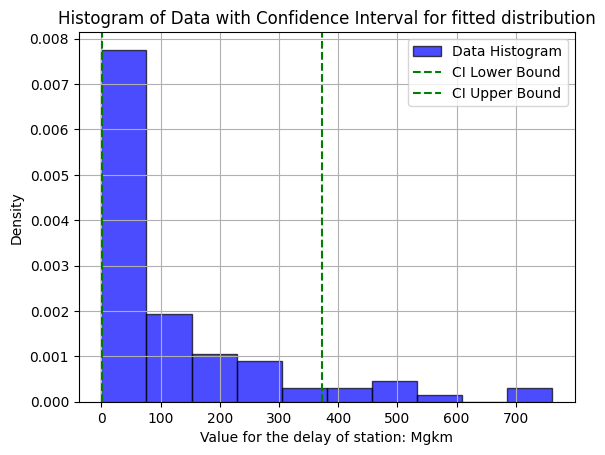

----------------------------------------------------------------------------------------------------
For the station: Tlmr


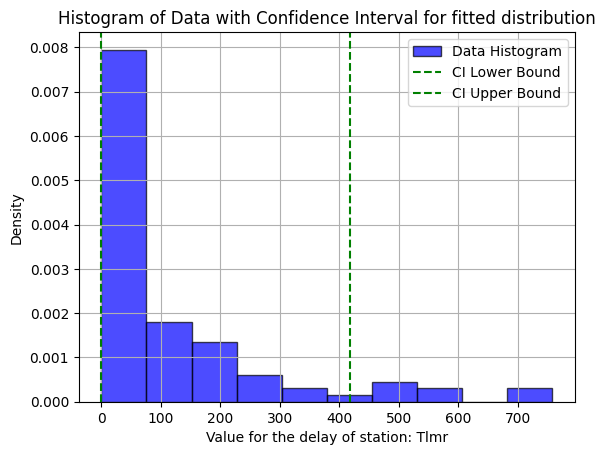

----------------------------------------------------------------------------------------------------
For the station: Jrna


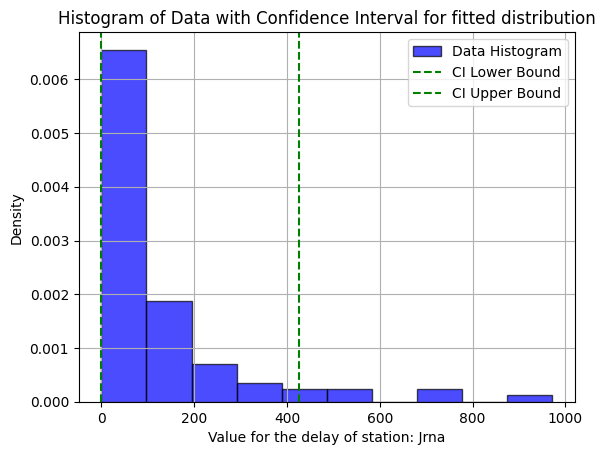

----------------------------------------------------------------------------------------------------
For the station: Jgnr


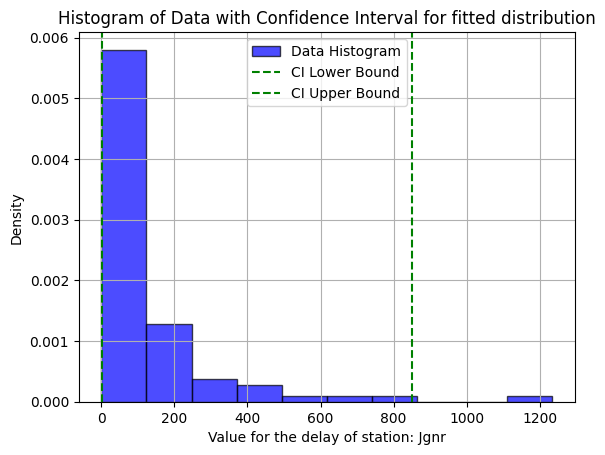

----------------------------------------------------------------------------------------------------
For the station: Agtl


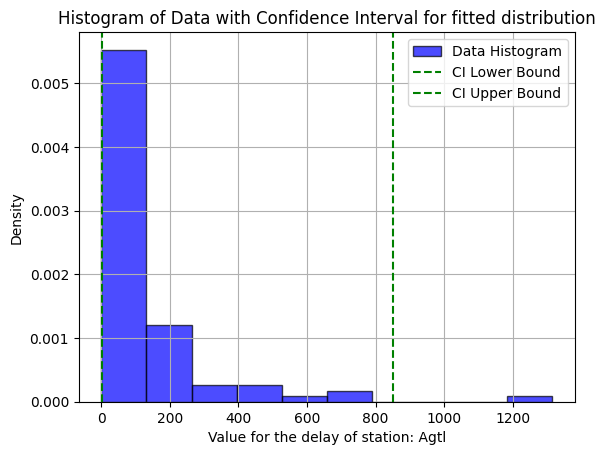

In [80]:
import numpy as np
import scipy.stats as stats

for i in range(len(delay_cols)):
  print("-"*100)
  print("For the station:",stations[i])
  delay_list = data[delay_cols[i]]-data[actual_cols[i]]
  delay_list /= 60
  delay_list = delay_list.apply(lambda x: max(0, x))
  shape, loc, scale = stats.gamma.fit(delay_list)

  sampled = np.random.gamma(shape=shape, scale=scale, size=100)

  # Calculate sample mean and standard deviation
  sample_mean = np.mean(sampled)
  sample_std = np.std(sampled, ddof=1)  # Using Bessel's correction
  n = len(sampled)

  # Confidence level (e.g., 90%)
  confidence_level = 0.90

  ci_lower, ci_upper = stats.gamma.interval(confidence_level, shape, loc, scale)

  # Plot histogram of data
  plt.hist(delay_list, bins=10, density=True, alpha=0.7, color='blue', edgecolor='black', label='Data Histogram')

  # Plot confidence interval lines
  plt.axvline(x=ci_lower, color='green', linestyle='--', label='CI Lower Bound')
  plt.axvline(x=ci_upper, color='green', linestyle='--', label='CI Upper Bound')
  # plt.text(ci_lower, 0.05, f'{ci_lower:.2f}', rotation=90, verticalalignment='bottom')
  # plt.text(ci_upper, 0.05, f'{ci_upper:.2f}', rotation=90, verticalalignment='bottom')


  plt.xlabel(f'Value for the delay of station: {stations[i]}')
  plt.ylabel('Density')
  plt.title('Histogram of Data with Confidence Interval for fitted distribution')
  plt.legend()
  plt.grid(True)
  plt.show()

In [105]:
tempdelay = pd.read_csv('tempdelay.csv')
tempdelay

TRAINID  TRAINNUMBER  SEQNUMBER STTNCODE   BLCKSCTN  WTTARVL  WTTDPRT  \
0         2         5676          1      Dmr   Dmr-Pasg  20400.0  20400.0   
1         2         5676          2     Pasg   Pasg-Pec  21120.0  21180.0   
2         2         5676          3      Pec   Pec-Kugt  22140.0  22200.0   
3         2         5676          4     Kugt  Kugt-Nlkt  23400.0  23520.0   
4         2         5676          5     Nlkt  Nlkt-Manu  24540.0  24600.0   
..      ...          ...        ...      ...        ...      ...      ...   
94        7        12098         11     Tlmr  Tlmr-Jrna  78060.0  78060.0   
95        7        12098         12     Jrna  Jrna-Jgnr  79620.0  79620.0   
96        7        12098         13     Jgnr  Jgnr-Agtl  80640.0  80640.0   
97        7        12098         14     Agtl       Agtl  81000.0      NaN   
98        8         7030          1      Dmr   Dmr-Pasg  85500.0  85620.0   

    WTTNEXTARVL  WTTDAYOFRUN  RUNTIME  ...  CREWCHNGCODE  LOCOCHANGE  \
0       20520.0            1    120.0  ...           NaN         NaN   
1       22140.0            1   1560.0  ...           NaN         NaN   
2       23400.0            1   1200.0  ...           NaN         NaN   
3       24540.0            1   1020.0  ...           NaN         NaN   
4       25500.0            1    900.0  ...           NaN         NaN   
..          ...          ...      ...  ...           ...         ...   
94      79620.0            1      NaN  ...           NaN         NaN   
95      80640.0            1      NaN  ...           NaN         NaN   
96      81000.0            1      NaN  ...           NaN         NaN   
97          NaN            1      NaN  ...           NaN         NaN   
98      86400.0            1      NaN  ...           NaN         NaN   

    TRTNCODE  GARBG  WATER  STTNLINE  PFDRTN  CLASSFLAG  REPORTINGFLAG  \
0        NaN    NaN    NaN       NaN     NaN        NaN            NaN   
1        NaN    NaN    NaN       NaN     NaN        NaN            NaN   
2        NaN    NaN    NaN       NaN     NaN        NaN            NaN   
3        NaN    NaN    NaN       NaN     NaN        NaN            NaN   
4        NaN    NaN    NaN       NaN     NaN        NaN            NaN   
..       ...    ...    ...       ...     ...        ...            ...   
94       NaN    NaN    NaN       NaN     NaN        NaN            NaN   
95       NaN    NaN    NaN       NaN     NaN        NaN            NaN   
96       NaN    NaN    NaN       NaN     NaN        NaN            NaN   
97       NaN    NaN    NaN       NaN     NaN        NaN            NaN   
98       NaN    NaN    NaN       NaN     NaN        NaN            NaN   

    BLCKSCTNLINE  
0            NaN  
1            NaN  
2            NaN  
3            NaN  
4            NaN  
..           ...  
94           NaN  
95           NaN  
96           NaN  
97           NaN  
98           NaN  

[99 rows x 49 columns]

In [107]:
saatotrain = tempdelay[(tempdelay.STTNCODE == 'Dmr')][['TRAINNUMBER','WTTDPRT']]
saatotrain

TRAINNUMBER  WTTDPRT
0          5676  20400.0
14        15625  10200.0
28        15664  48300.0
42        13173  56640.0
56         7680  56460.0
70        14620  81840.0
84        12098  69900.0
98         7030  85620.0

In [108]:
sorted_df = saatotrain.sort_values(by='WTTDPRT')

In [109]:
sorted_df

TRAINNUMBER  WTTDPRT
14        15625  10200.0
0          5676  20400.0
28        15664  48300.0
56         7680  56460.0
42        13173  56640.0
84        12098  69900.0
70        14620  81840.0
98         7030  85620.0

In [110]:
selected_stations = [15664, 13173, 14620]
startstationtime = None
endstationtime = None
for trainnumber in sorted_df.TRAINNUMBER:
  if trainnumber in selected_stations:
    startstationtime = sorted_df[sorted_df.TRAINNUMBER == trainnumber]['WTTDPRT'].values[0]
    break

count = 0
for trainnumber in sorted_df.TRAINNUMBER:
  if trainnumber in selected_stations:
    count+=1
    if count ==3:
      endstationtime = sorted_df[sorted_df.TRAINNUMBER == trainnumber]['WTTDPRT'].values[0]

In [111]:
print(startstationtime)
print(endstationtime)

48300.0
81840.0


In [112]:
sorted_df = sorted_df[(sorted_df.WTTDPRT>=startstationtime) & (sorted_df.WTTDPRT<=endstationtime)]

In [113]:
sorted_df

TRAINNUMBER  WTTDPRT
28        15664  48300.0
56         7680  56460.0
42        13173  56640.0
84        12098  69900.0
70        14620  81840.0

In [116]:
with open('12.txt','w') as occ:
  occ.write('/*Train-No. Direction Start-Time(HHMM) Length(Km) Acceleration(m/s^2) Deceleration(m/s^2) Priority Maximum-Speed(kmph) Start-Loop End-Loop Number-Of-Halts Station Minutes-of-Halt Station Minutes-of-Halt*/\n')
  # Generate additional rows with start times ranging from 800 to 900
  traincount = 0
  timelist = sorted_df["WTTDPRT"].values
  timelist /= 60
  for i in range(len(timelist)-1):
    last_start_time = timelist[i]
    for start_time in range(int(last_start_time) + 20, int(timelist[i+1]), 20):
      traincount+=1
      row = f"{traincount} up {start_time} 0.5 0.08 0.15 1 70 10001 140001 0"
      occ.write(row + "\n")


In [82]:
# Open the file for reading and writing
with open("/content/12.txt", "r+") as file:
    # Read existing content
    content = file.readlines()

    # Get the last start time in the file
    last_start_time = int(content[-1].split()[0])

    # Generate additional rows with start times ranging from 800 to 900
    for start_time in range(last_start_time + 50, 951, 50):
        row = f"{start_time} up {start_time} 0.5 0.08 0.15 1 70 10001 140001 0\n"
        content.append(row)

    # Move the file pointer to the beginning
    file.seek(0)

    # Write the updated content back to the file
    file.writelines(content)